<a href="https://colab.research.google.com/github/HaThiKhanhLy/ML/blob/main/Nhom22_TruongPhanNgocTruc_20130449_HaThiKhanhLy_2013020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATASET TIC-TAC-TOE ENDGAME**
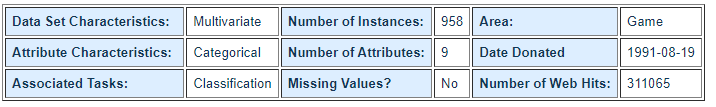**
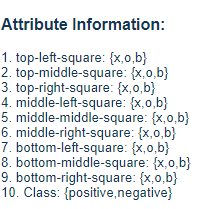

# **0.MOUNT DRIVE**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ML'

Mounted at /content/gdrive
/content/gdrive/MyDrive/ML


# **1.IMPORT LIBRARIES**

In [ ]:
#code
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score ,classification_report
from sklearn import metrics
from sklearn.metrics import precision_score
from prettytable import PrettyTable
from sklearn import svm
from sklearn.model_selection import cross_validate

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.wrappers.scikit_learn import KerasClassifier


# **2.LOAD DATASET**

In [ ]:
#code
datasets = pd.read_csv("tic-tac-toe.csv")
datasets.head(10)

,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3,positive
0,x,x,x,x,o,o,o,x,o,positive
1,x,x,x,x,o,o,o,o,x,positive
2,x,x,x,x,o,o,o,b,b,positive
3,x,x,x,x,o,o,b,o,b,positive
4,x,x,x,x,o,o,b,b,o,positive
5,x,x,x,x,o,b,o,o,b,positive
6,x,x,x,x,o,b,o,b,o,positive
7,x,x,x,x,o,b,b,o,o,positive
8,x,x,x,x,b,o,o,o,b,positive
9,x,x,x,x,b,o,o,b,o,positive


# **Create name columns**

In [ ]:
datasets.columns = [
    "TL", #top-left-square
    "TM",#top-middle-square
    "TR",#top-right-square
     "ML",#middle-left-square
    "MM",#middle-middle-square
    "MR",#middle-right-square
    "BL",#bottom-left-square
    "BM",#bottom-middle-square
    "BR",#bottom-right-square
    "Class"
 ]

In [ ]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957 entries, 0 to 956
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   TL      957 non-null    object
 1   TM      957 non-null    object
 2   TR      957 non-null    object
 3   ML      957 non-null    object
 4   MM      957 non-null    object
 5   MR      957 non-null    object
 6   BL      957 non-null    object
 7   BM      957 non-null    object
 8   BR      957 non-null    object
 9   Class   957 non-null    object
dtypes: object(10)
memory usage: 74.9+ KB


=> Tất ca dữ liệu k bị mất k xử lý missing

In [ ]:
datasets.head(10)

,TL,TM,TR,ML,MM,MR,BL,BM,BR,Class
0,x,x,x,x,o,o,o,x,o,positive
1,x,x,x,x,o,o,o,o,x,positive
2,x,x,x,x,o,o,o,b,b,positive
3,x,x,x,x,o,o,b,o,b,positive
4,x,x,x,x,o,o,b,b,o,positive
5,x,x,x,x,o,b,o,o,b,positive
6,x,x,x,x,o,b,o,b,o,positive
7,x,x,x,x,o,b,b,o,o,positive
8,x,x,x,x,b,o,o,o,b,positive
9,x,x,x,x,b,o,o,b,o,positive


# **3. Show statistics of the given dataset**

In [ ]:
datasets.describe()

,TL,TM,TR,ML,MM,MR,BL,BM,BR,Class
count,957,957,957,957,957,957,957,957,957,957
unique,3,3,3,3,3,3,3,3,3,2
top,x,x,x,x,x,x,x,x,x,positive
freq,417,377,417,377,458,378,417,378,418,625


In [ ]:
datasets.shape

(957, 10)

# **4. Use histogram plot to represent the distribution**

array([<Axes: title={'center': 'negative'}>,
       <Axes: title={'center': 'positive'}>], dtype=object)

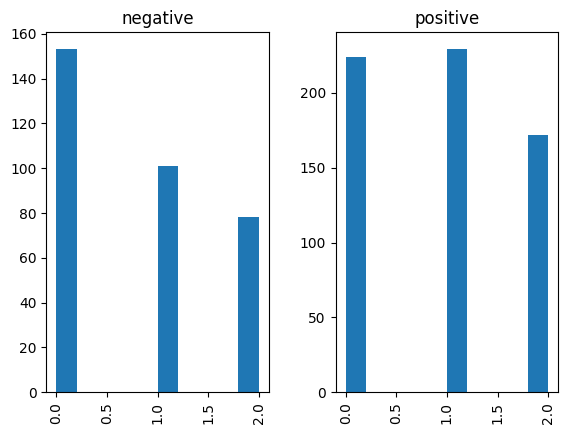

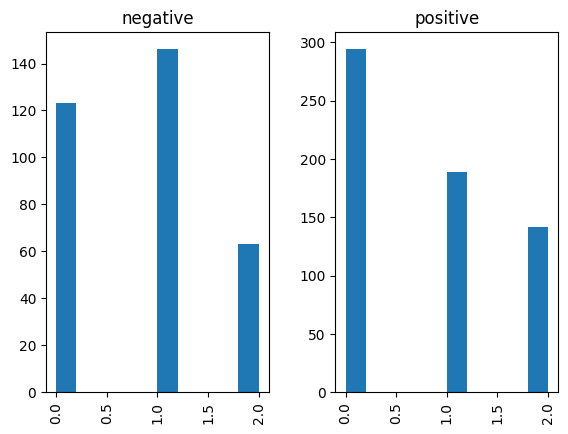

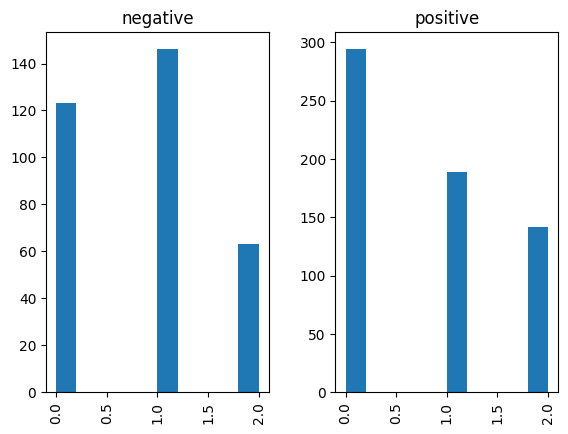

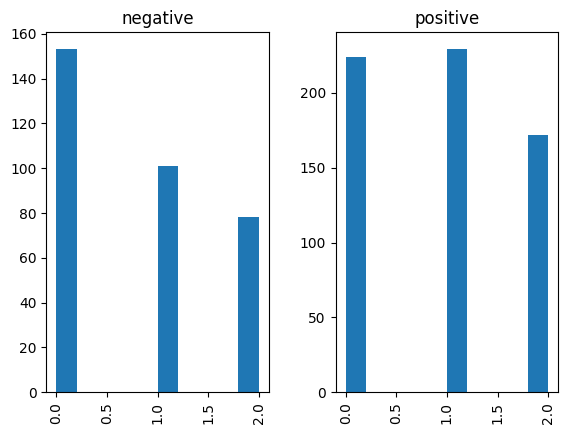

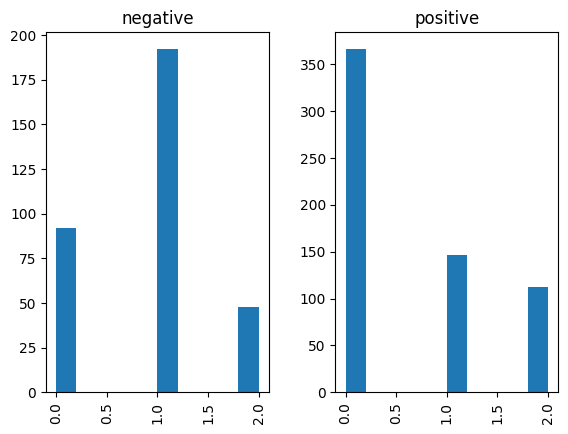

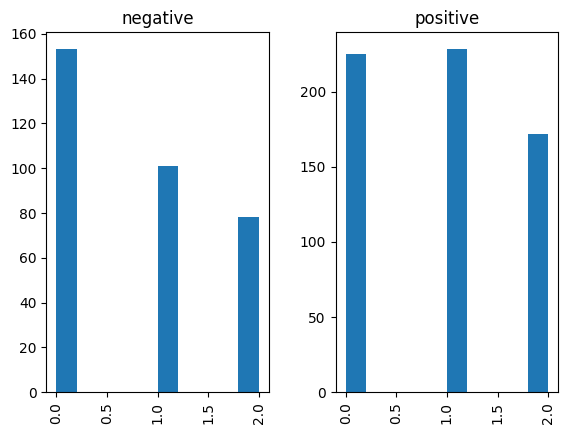

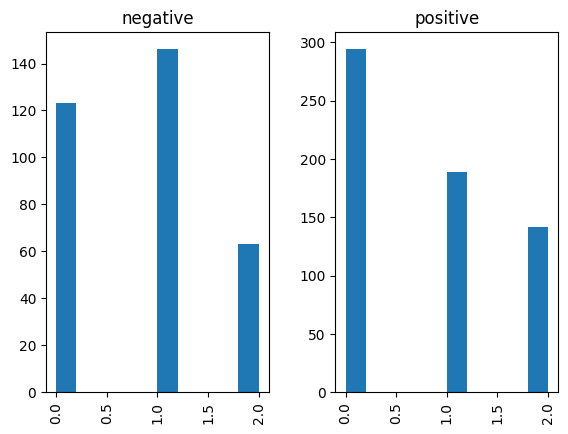

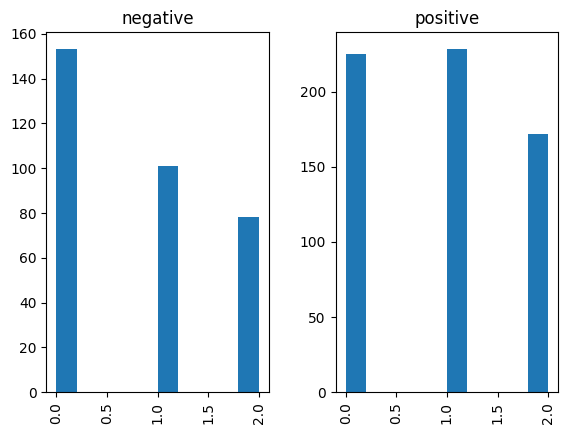

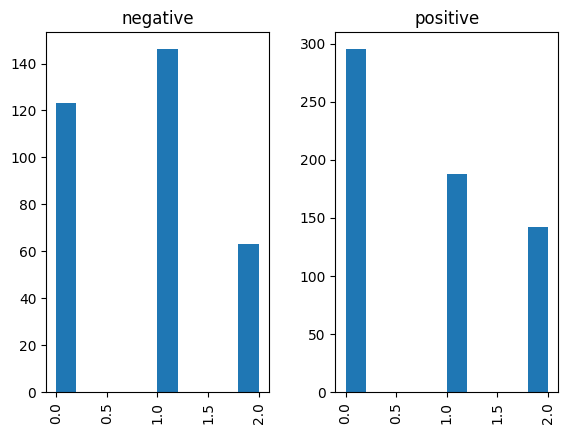

In [ ]:
datasets.TM.hist(by=datasets.Class)
datasets.TL.hist(by=datasets.Class)
datasets.TR.hist(by=datasets.Class)
datasets.ML.hist(by=datasets.Class)
datasets.MM.hist(by=datasets.Class)
datasets.MR.hist(by=datasets.Class)
datasets.BL.hist(by=datasets.Class)
datasets.BM.hist(by=datasets.Class)
datasets.BR.hist(by=datasets.Class)

<Axes: >

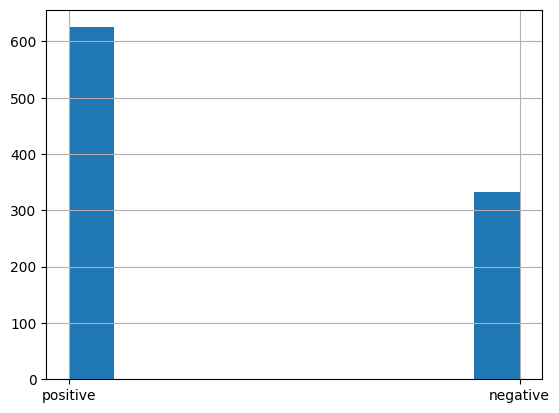

In [ ]:
datasets.Class.hist()

# **Đổi kiểu dữ liệu từ dạng chuỗi sang dang số**

In [ ]:
datasets.replace('x',0,inplace=True)
datasets.replace('o',1,inplace=True)
datasets.replace('b',2,inplace=True)
datasets.head()

,TL,TM,TR,ML,MM,MR,BL,BM,BR,Class
0,0,0,0,0,1,1,1,0,1,positive
1,0,0,0,0,1,1,1,1,0,positive
2,0,0,0,0,1,1,1,2,2,positive
3,0,0,0,0,1,1,2,1,2,positive
4,0,0,0,0,1,1,2,2,1,positive


In [ ]:
datasets.replace('negative',0,inplace=True)
datasets.replace('positive',1,inplace=True)
datasets.head()

,TL,TM,TR,ML,MM,MR,BL,BM,BR,Class
0,0,0,0,0,1,1,1,0,1,1
1,0,0,0,0,1,1,1,1,0,1
2,0,0,0,0,1,1,1,2,2,1
3,0,0,0,0,1,1,2,1,2,1
4,0,0,0,0,1,1,2,2,1,1


In [ ]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957 entries, 0 to 956
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   TL      957 non-null    int64
 1   TM      957 non-null    int64
 2   TR      957 non-null    int64
 3   ML      957 non-null    int64
 4   MM      957 non-null    int64
 5   MR      957 non-null    int64
 6   BL      957 non-null    int64
 7   BM      957 non-null    int64
 8   BR      957 non-null    int64
 9   Class   957 non-null    int64
dtypes: int64(10)
memory usage: 74.9 KB


In [ ]:
X = datasets[ ['TL',
    'TM',
    'TR',
     'ML',
    'MM',
    'MR',
    'BL',
    'BM',
    'BR']]
y = datasets['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# **REGRESSION**

In [ ]:
#Logistic regression
classifier = LogisticRegression(max_iter=1000) 
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred_regression = classifier.predict(X_test)
score = cross_validate(classifier,X,y, scoring='accuracy',cv =10)
cm = confusion_matrix(y_test,y_pred_regression)

Accuracy: 0.6840277777777778
Precision: 0.6847543760587239
Recall: 0.5854933110367893
F1-Score: 0.5685428773685857
Confusion Matrix: 
 [[ 24  80]
 [ 11 173]]


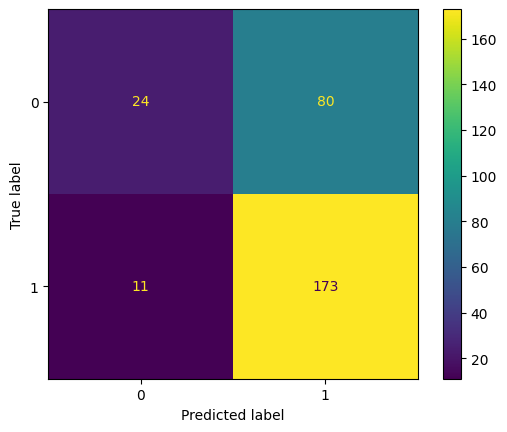

In [ ]:
accuracy_regression= metrics.accuracy_score(y_test, y_pred_regression)
precision_regression =metrics.precision_score(y_test, y_pred_regression,average="macro")
recall_regression = metrics.recall_score(y_test, y_pred_regression,average="macro")
f1_score_regresstion = metrics.f1_score(y_test, y_pred_regression,average="macro")

print("Accuracy:", accuracy_regression)
print("Precision:",precision_regression)
print("Recall:",recall_regression)
print("F1-Score:",f1_score_regresstion)
print("Confusion Matrix: \n", cm)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_regression)

# **NEURAL NETWORKS**

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=9, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0,2))

model.add(Dense(32, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0,2))

model.add(Dense(16, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0,2))

model.add(Dense(1, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0,2))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = model.fit(X_train,y_train, batch_size=10, epochs=100, verbose= 2)

Epoch 1/100
67/67 - 3s - loss: 1.6366 - accuracy: 0.3782 - 3s/epoch - 45ms/step
Epoch 2/100
67/67 - 0s - loss: 0.6661 - accuracy: 0.6562 - 275ms/epoch - 4ms/step
Epoch 3/100
67/67 - 0s - loss: 0.6770 - accuracy: 0.6532 - 350ms/epoch - 5ms/step
Epoch 4/100
67/67 - 0s - loss: 0.6505 - accuracy: 0.6652 - 228ms/epoch - 3ms/step
Epoch 5/100
67/67 - 0s - loss: 0.6502 - accuracy: 0.6472 - 122ms/epoch - 2ms/step
Epoch 6/100
67/67 - 0s - loss: 0.6654 - accuracy: 0.6712 - 115ms/epoch - 2ms/step
Epoch 7/100
67/67 - 0s - loss: 0.6391 - accuracy: 0.6771 - 113ms/epoch - 2ms/step
Epoch 8/100
67/67 - 0s - loss: 0.6339 - accuracy: 0.6846 - 105ms/epoch - 2ms/step
Epoch 9/100
67/67 - 0s - loss: 0.6228 - accuracy: 0.6906 - 112ms/epoch - 2ms/step
Epoch 10/100
67/67 - 0s - loss: 0.6092 - accuracy: 0.6891 - 122ms/epoch - 2ms/step
Epoch 11/100
67/67 - 0s - loss: 0.6022 - accuracy: 0.7190 - 108ms/epoch - 2ms/step
Epoch 12/100
67/67 - 0s - loss: 0.5890 - accuracy: 0.7220 - 108ms/epoch - 2ms/step
Epoch 13/100
67

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5862248539924622
Test accuracy: 0.9409722089767456


9/9 [==============================] - 0s 3ms/step
Accuracy:  0.3611111111111111
Precision:  0.18055555555555555
Recall:  0.5
F1 score: 0.26530612244897955


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


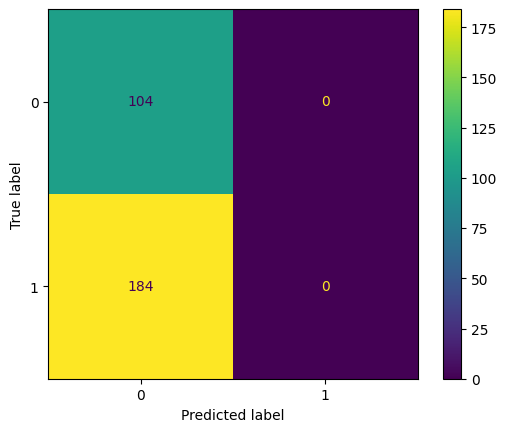

In [ ]:
y_neural = model.predict(X_test)
y_pred_neural = np.argmax(y_neural, axis=1)
accuracy_neural = accuracy_score(y_test, y_pred_neural)
precision_neural = precision_score(y_test, y_pred_neural, average='macro')
recall_neural = metrics.recall_score(y_test, y_pred_neural, average='macro')
f1_score_neural = metrics.f1_score(y_test, y_pred_neural, average='macro')

print('Accuracy: ',  accuracy_neural)
print('Precision: ',  precision_neural)
print('Recall: ', recall_neural)
print('F1 score:', f1_score_neural)

ConfusionMatrixDisplay.from_predictions(y_test,y_pred_neural)

# **KNN**

Accuracy: 0.8506944444444444
Precision: 0.8987301587301587
Recall: 0.7953595317725752
F1-Score: 0.818690247866126
              precision    recall  f1-score   support

           0       0.98      0.60      0.74       104
           1       0.81      0.99      0.89       184

    accuracy                           0.85       288
   macro avg       0.90      0.80      0.82       288
weighted avg       0.88      0.85      0.84       288



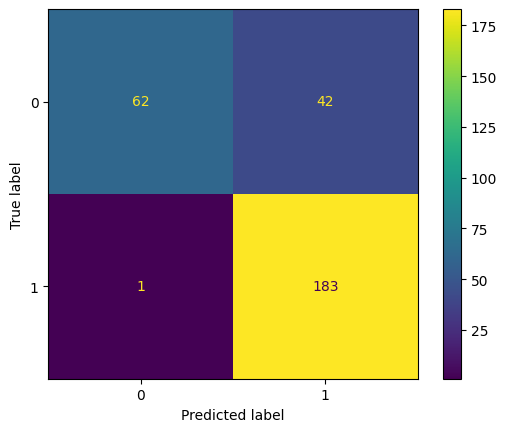

In [ ]:
# Create a KNN classifier with k=5
knn= KNeighborsClassifier(n_neighbors=5)
# Train the classifier on the training data
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)
# Test the classifier on the testing data and print the accuracy score

accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn,average = 'macro')
recall_knn = metrics.recall_score(y_test, y_pred_knn,average = 'macro')
f1_score_knn = metrics.f1_score(y_test, y_pred_knn,average = 'macro')
print("Accuracy:", accuracy_knn)
print("Precision:",precision_knn)
print("Recall:",recall_knn)
print("F1-Score:",f1_score_knn)

print(metrics.classification_report(y_test,y_pred_knn))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_knn)

# **SVM**

Accuracy: 0.4652777777777778
Precision: 0.3798076923076923
Recall: 0.39548494983277593
F1-Score: 0.3850931677018633
              precision    recall  f1-score   support

           0       0.19      0.14      0.16       104
           1       0.57      0.65      0.61       184

    accuracy                           0.47       288
   macro avg       0.38      0.40      0.39       288
weighted avg       0.43      0.47      0.45       288



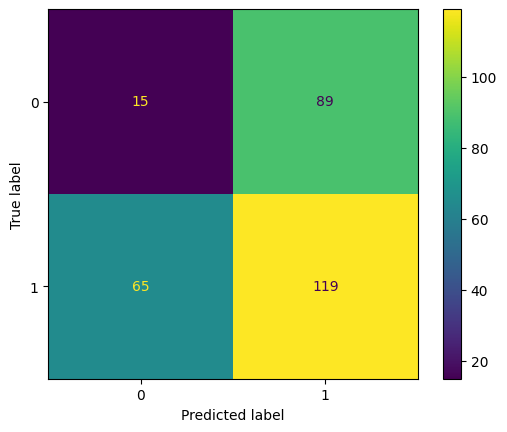

In [ ]:
clf = svm.SVC(kernel='sigmoid',random_state=0)
clf.fit(X_train,y_train)
y_pred_svm = clf.predict(X_test)
clf.score(X_test, y_test)
metrics.accuracy_score(y_test,y_pred_svm)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm,average = 'macro')
recall_svm = metrics.recall_score(y_test, y_pred_svm,average = 'macro')
f1_score_svm = metrics.f1_score(y_test, y_pred_svm,average = 'macro')

print("Accuracy:", accuracy_svm)
print("Precision:",precision_svm)
print("Recall:",recall_svm)
print("F1-Score:",f1_score_svm)

print(metrics.classification_report(y_test,y_pred_svm))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_svm)

Accuracy: 0.8645833333333334
Precision: 0.9125560538116593
Recall: 0.8125
F1-Score: 0.8367038367038366
              precision    recall  f1-score   support

           0       1.00      0.62      0.77       104
           1       0.83      1.00      0.90       184

    accuracy                           0.86       288
   macro avg       0.91      0.81      0.84       288
weighted avg       0.89      0.86      0.86       288



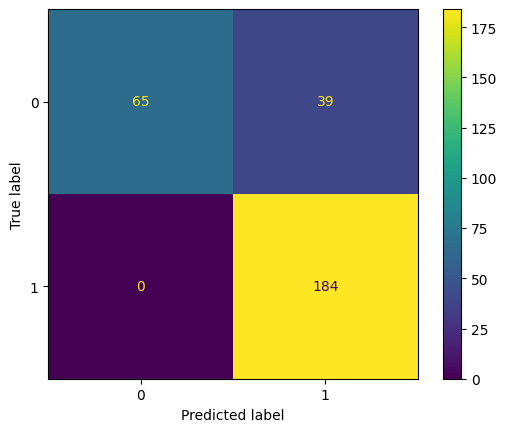

In [ ]:
model = svm.SVC(kernel='rbf', probability=True)
model.fit(X_train,y_train)
y_pred_svm_b = model.predict(X_test)
model.score(X_test, y_test)
metrics.accuracy_score(y_test,y_pred_svm_b)

accuracy_svm_b = accuracy_score(y_test, y_pred_svm_b)
precision_svm_b = precision_score(y_test, y_pred_svm_b,average = 'macro')
recall_svm_b = metrics.recall_score(y_test, y_pred_svm_b,average = 'macro')
f1_score_svm_b = metrics.f1_score(y_test, y_pred_svm_b,average = 'macro')

print("Accuracy:", accuracy_svm_b)
print("Precision:",precision_svm_b)
print("Recall:",recall_svm_b)
print("F1-Score:",f1_score_svm_b)

print(metrics.classification_report(y_test,y_pred_svm_b))

ConfusionMatrixDisplay.from_predictions(y_test,y_pred_svm_b)

# **So sánh kết quả các thuật toán dựa trên các metrics:**

In [ ]:
table=PrettyTable(['Algorithm','Accuracy', 'Precision', 'Recall',' F1_score'])
table.add_row(['KNN',accuracy_knn, precision_knn, recall_knn, f1_score_knn])
table.add_row(['SVM_sigmoid',accuracy_svm, precision_svm, recall_svm, f1_score_svm])
table.add_row(['SVM_rbf',accuracy_svm_b, precision_svm_b, recall_svm_b, f1_score_svm_b])
table.add_row(["REGRESSION", accuracy_regression,precision_regression, recall_regression, f1_score_regresstion])
table.add_row(["NEURAL",accuracy_neural,precision_neural,recall_neural,f1_score_neural])
print(table)

+-------------+--------------------+---------------------+---------------------+---------------------+
|  Algorithm  |      Accuracy      |      Precision      |        Recall       |       F1_score      |
+-------------+--------------------+---------------------+---------------------+---------------------+
|     KNN     | 0.8506944444444444 |  0.8987301587301587 |  0.7953595317725752 |  0.818690247866126  |
| SVM_sigmoid | 0.4652777777777778 |  0.3798076923076923 | 0.39548494983277593 |  0.3850931677018633 |
|   SVM_rbf   | 0.8645833333333334 |  0.9125560538116593 |        0.8125       |  0.8367038367038366 |
|  REGRESSION | 0.6840277777777778 |  0.6847543760587239 |  0.5854933110367893 |  0.5685428773685857 |
|    NEURAL   | 0.3611111111111111 | 0.18055555555555555 |         0.5         | 0.26530612244897955 |
+-------------+--------------------+---------------------+---------------------+---------------------+


# **Biểu đồ**

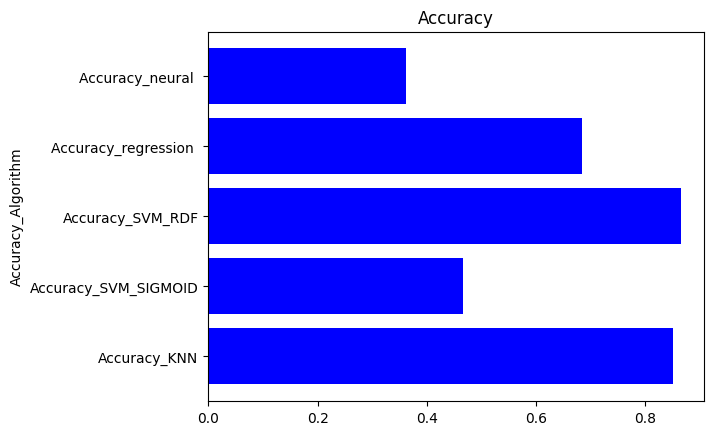

In [ ]:
name = ["Accuracy_KNN", "Accuracy_SVM_SIGMOID" ,"Accuracy_SVM_RDF","Accuracy_regression ","Accuracy_neural "]
values = [accuracy_knn,accuracy_svm,accuracy_svm_b,accuracy_regression,accuracy_neural]

plt.barh(name,values, color="blue")
plt.ylabel('Accuracy_Algorithm')
plt.title('Accuracy')
plt.show()

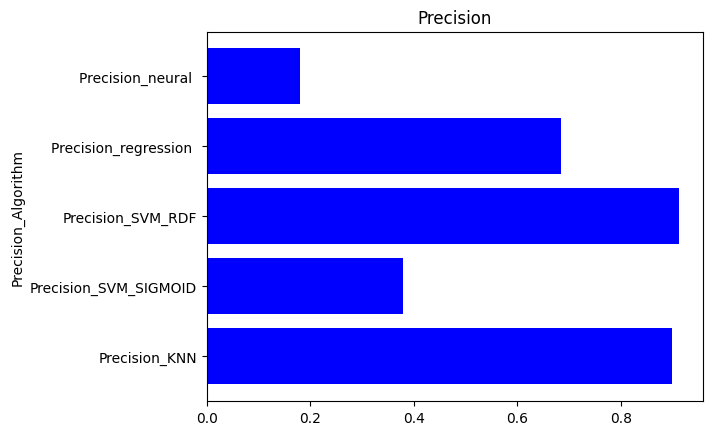

In [ ]:
name = ["Precision_KNN", "Precision_SVM_SIGMOID" ,"Precision_SVM_RDF","Precision_regression ","Precision_neural "]
values = [precision_knn,precision_svm,precision_svm_b,precision_regression,precision_neural]

plt.barh(name,values, color="blue")
plt.ylabel('Precision_Algorithm')
plt.title('Precision')
plt.show()

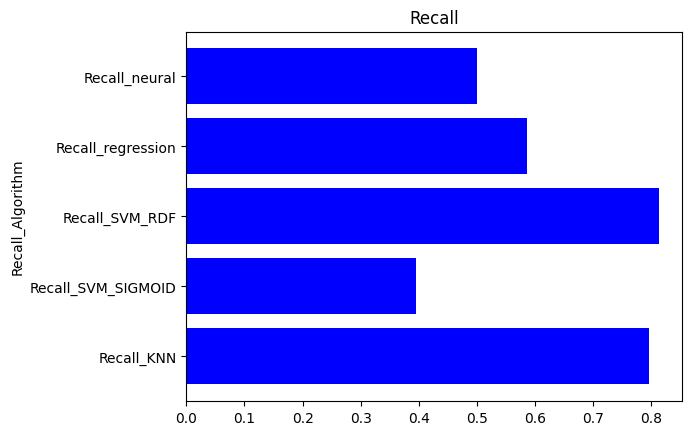

In [ ]:
name = ["Recall_KNN", "Recall_SVM_SIGMOID" ,"Recall_SVM_RDF","Recall_regression","Recall_neural"]
values = [recall_knn,recall_svm,recall_svm_b,recall_regression,recall_neural]

plt.barh(name,values, color="blue")
plt.ylabel('Recall_Algorithm')
plt.title('Recall')
plt.show()

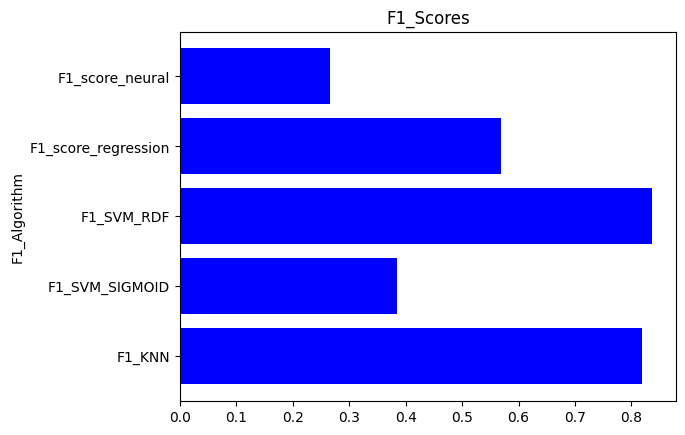

In [ ]:
name = ["F1_KNN", "F1_SVM_SIGMOID" ,"F1_SVM_RDF","F1_score_regression","F1_score_neural"]
values = [f1_score_knn,f1_score_svm,f1_score_svm_b,f1_score_regresstion,f1_score_neural]

plt.barh(name,values, color="blue")
plt.ylabel('F1_Algorithm')
plt.title('F1_Scores')
plt.show()